#Alura Imersão Dados - **4ª Edição** - Notebook de Anagê

In [2]:
import pandas as pd
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(caminho)
data["Metragem"].mean()


442.30065947242207

In [ ]:
data.sample(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1181,NaN,Jardim Leonor,São Paulo,455,4,6,6,R$ 3.500.000
3035,Rua Maria Carolina,Jardim Paulistano,São Paulo,605,3,5,4,R$ 9.500.000
8143,NaN,Bosque da Saúde,São Paulo,405,5,1,5,R$ 1.800.000


In [ ]:
#data["Quartos"][3333] -- 2 jeitos de pegar coluna
data.Quartos[3333]
#data.info() #-- Informação dos nossos dados de todo dataframe

4

In [ ]:
data["Metragem"].mean() #Média da metragem de todos imóveis do BD

442.30065947242207

In [ ]:
sum((data["Bairro"] == "Vila Mariana")) #Total de bairros da Vila Mariana

184

In [ ]:
tem_imoveis_vila = (data["Bairro"] == "Vila Mariana")
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [ ]:
imoveis_vila_mariana = data[tem_imoveis_vila]
imoveis_vila_mariana["Quartos"].mean()

3.375

In [ ]:
data["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

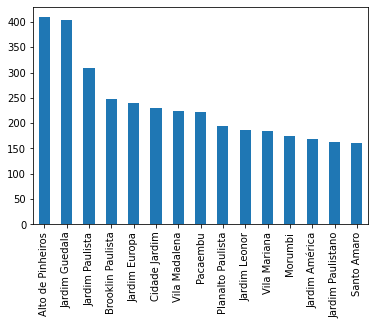

In [ ]:
n_imoveis_bairro = data["Bairro"].value_counts()
n_imoveis_bairro.head(15).plot.bar()

# Desafios - Aula 1


1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo **Paulo**)

In [ ]:
#Utilizando a função group by, onde você consegue realizar operações em colunas agrupadas por tipo, etc. Documentação https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
data.groupby("Bairro")["Metragem"].mean()



Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

In [ ]:
bairros_metragem = data.groupby("Bairro") #1º Jeito - Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

escolha_bairro = "Vila Mariana"             #2º Jeito - Documentação: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html?highlight=select
data[data["Bairro"] == escolha_bairro]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

In [38]:
data.sort_values(by=['Banheiros']).max().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


TypeError: ignored

4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

In [23]:
#Pegando média de banheiros
data["Banheiros"].mean()
data["Banheiros"].max()
data["Banheiros"].idxmax() #O imóvel com mais banheiros possui 40 o.o' #Outlier
data.loc[2062] #Localização da tupla 2062 que é onde descobrimos onde possui 40 banheiros, fiquei curioso
data["Banheiros"].idxmin() #1 banheiro no mínimo, ainda bem
data["Banheiros"].median() #Mediana dos banheiros é 4 

4.0

5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)


In [ ]:
data[data["Rua"].isna()]["Bairro"] #Bairros que possuem ruas com NaN - Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.isna.html

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9963                   Jardim Petrópolis
9989                Parque Alves de Lima
9991                        Vila Formosa
9995                       Jardim Leonor
9999                   Jardim Petrópolis
Name: Bairro, Length: 3434, dtype: object